In [1]:
import pylab as plt 
import numpy as np 

In [2]:
K = [8,16,32,64,85,100,150,200,300,500]

load = lambda s: np.loadtxt(s,delimiter=',').mean(axis=0)
extend = lambda s: [s] * len(K)

In [3]:
def get_data(dname: str):
    prefix = f"../hd_data/{dname}/"

    tsne = load(prefix+"tsne_metrics.txt")
    umap = load(prefix+"umap_metrics.txt")
    mds = load(prefix+"mds_metrics.txt")

    l2g = np.zeros((len(K),3))
    for i,k in enumerate(K):
        l2g[i] = load(prefix+f"l2g_{k}_metrics.txt")
    return l2g,tsne,umap,mds


In [4]:
def make_fig(ind, m_name, floc,datas):
    l2g,tsne,umap,mds = datas
    fig, ax = plt.subplots()

    ax.plot(K,l2g[:,ind],'o-',label="L2G")
    ax.plot(K,extend(tsne[ind]), '--',label="t-SNE")
    ax.plot(K,extend(umap[ind]), '--',label="UMAP")
    ax.plot(K,extend(mds[ind]), '--',label="MDS")
    ax.legend()

    ax.set_xlabel("k")
    ax.set_ylabel(m_name)
    fig.suptitle(f"{m_name} on HAR")
    fig.savefig(floc)

In [5]:
datasets = [
    "har",
    "fashion-mnist",
    "imdb",
    "mnist",
    "coil20",
    "cifar10",
    "cnae9",
    "fmd",
    "spambase"
]

/tmp/ipykernel_156869/2195178819.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


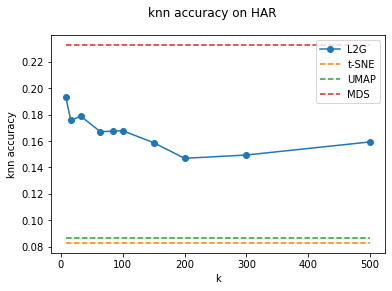

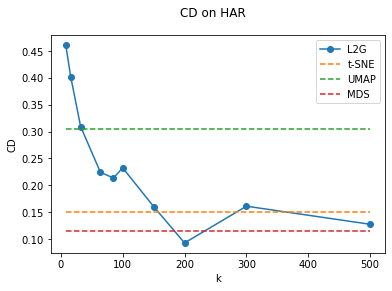

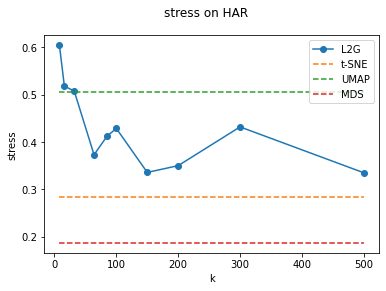

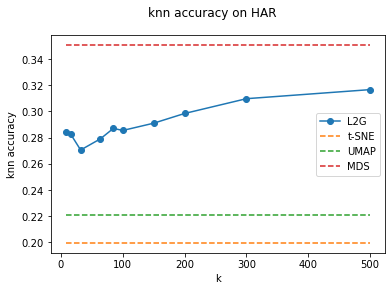

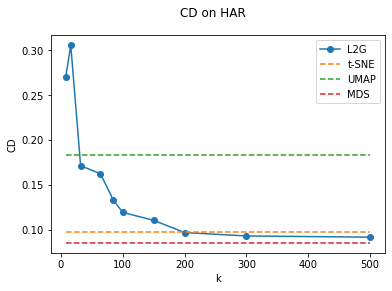

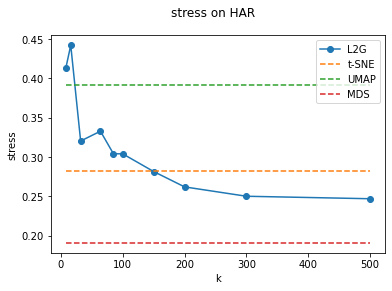

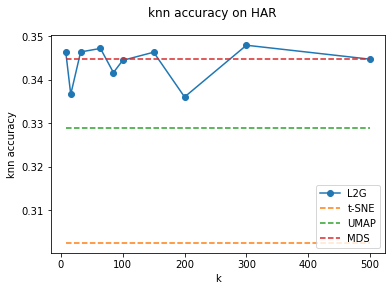

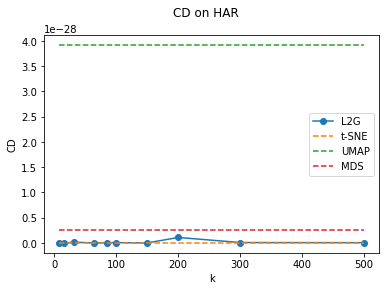

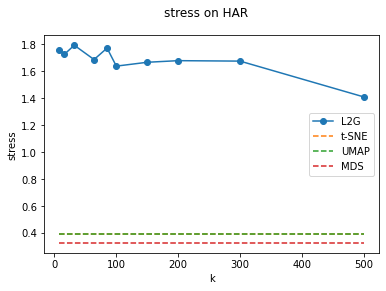

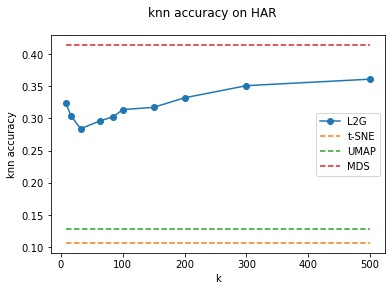

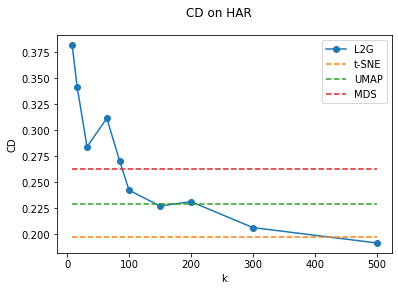

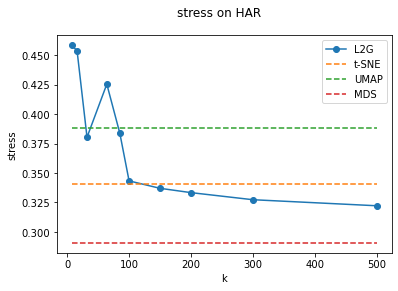

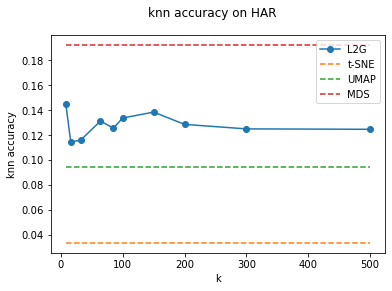

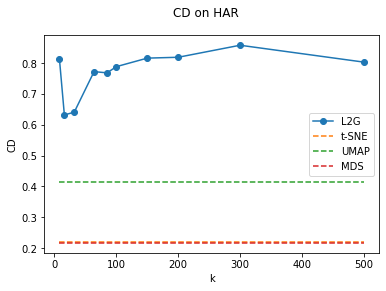

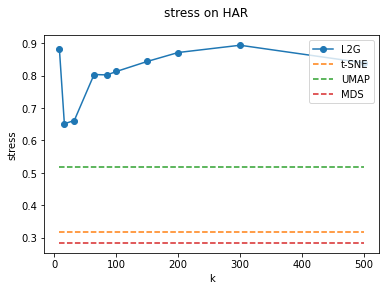

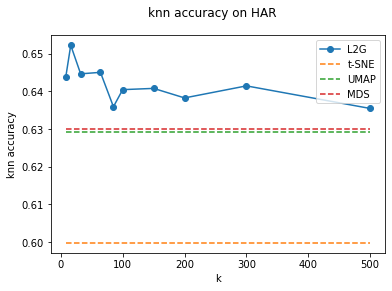

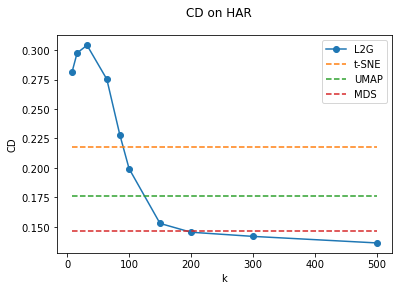

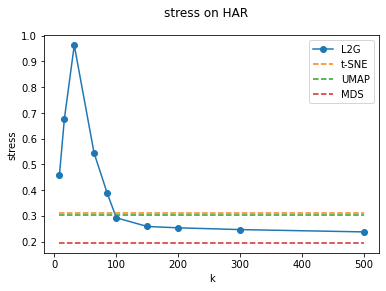

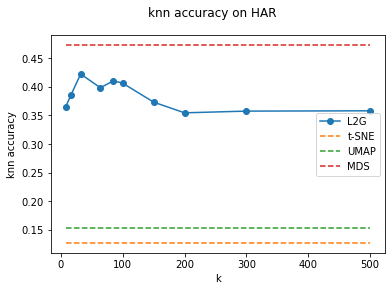

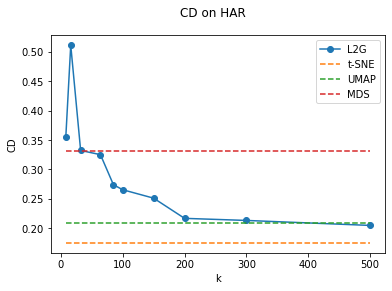

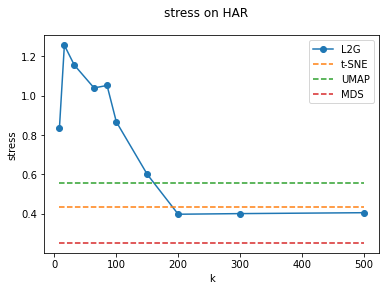

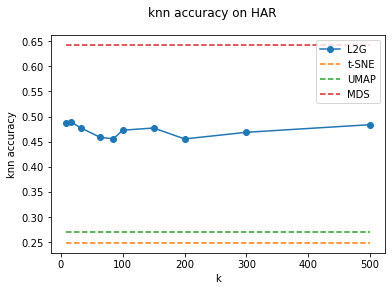

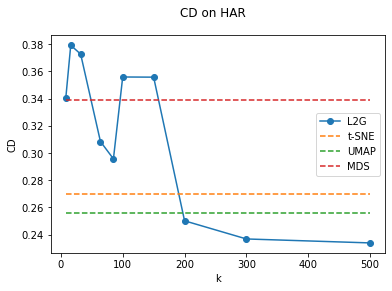

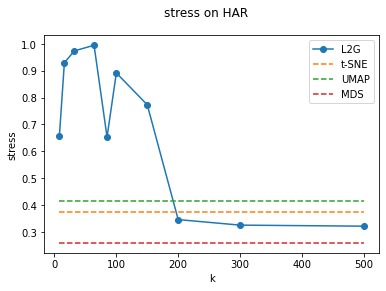

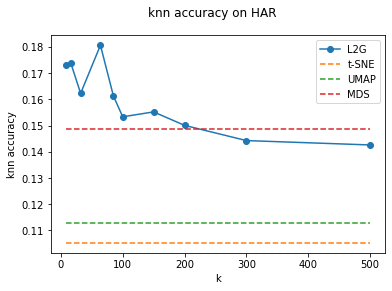

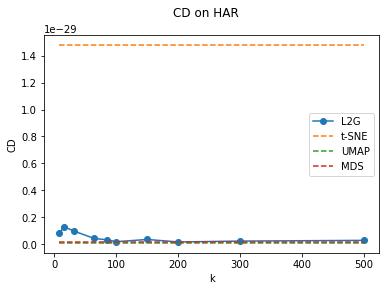

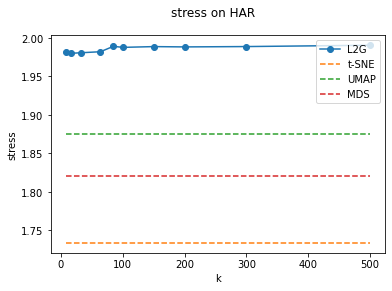

In [7]:
for ds in datasets:
    data = get_data(ds)
    make_fig(0,"knn accuracy", f"figures/{ds}/knn_acc.pdf",data)
    make_fig(1,"CD", f"figures/{ds}/cd.pdf",data)
    make_fig(2,"stress",f"figures/{ds}/stress.pdf",data)